# Coursework 1 Group (text)

Complete the following information

Group number: ...

Student names and k-numbers:
1. ...
2. ...
3. ...
4. ...






# Load modules (code)

In [4]:
# add code for loading modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Load data (code)

In [5]:
data = datasets.load_digits()

df = pd.DataFrame(data.data)
df['target'] = data.target

# Classification

## Classification methods used (text)

Mention the classification methods used below. You should not describe them, but if they have not been discussed in the class, you should cite the source:


1.   ...
2.   ...
3.   ...



## Training (code)

In [6]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print("Decision Tree Model training completed.")

Decision Tree Model training completed.


## Evaluation (code)

Model Accuracy: 0.8250
Balanced Accuracy: 0.8242

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.84      0.72      0.78        36
           2       0.78      0.80      0.79        35
           3       0.79      0.81      0.80        37
           4       0.86      0.86      0.86        36
           5       0.88      0.95      0.91        37
           6       0.81      0.83      0.82        36
           7       0.84      0.86      0.85        36
           8       0.71      0.69      0.70        35
           9       0.82      0.75      0.78        36

    accuracy                           0.82       360
   macro avg       0.82      0.82      0.82       360
weighted avg       0.82      0.82      0.82       360



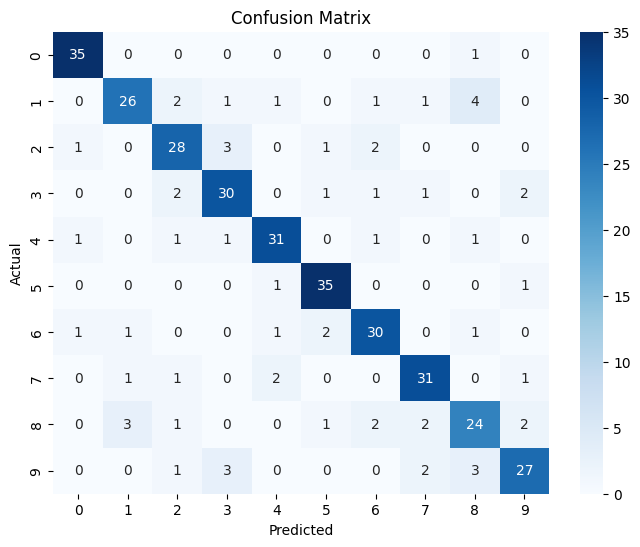

ROC AUC Score (Macro-Averaged): 0.9024


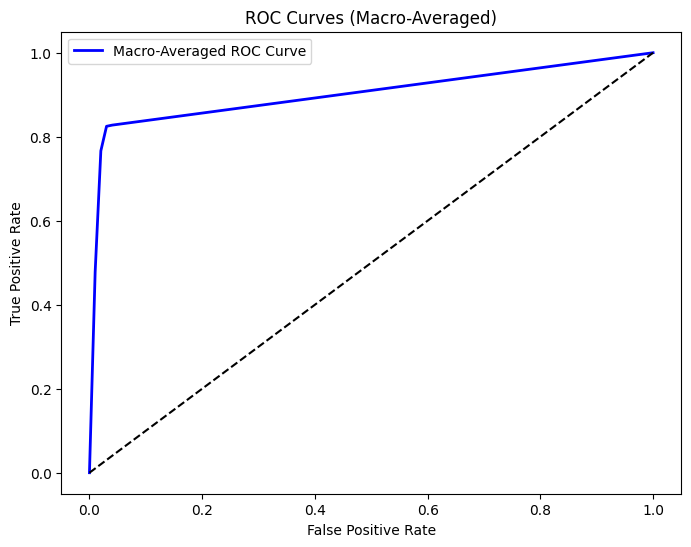

In [7]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

y_test_binarized = label_binarize(y_test, classes=range(10))
y_pred_proba = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average="macro")

print(f"ROC AUC Score (Macro-Averaged): {roc_auc:.4f}")

mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)

for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    mean_tpr += np.interp(mean_fpr, fpr, tpr)

mean_tpr /= 10

plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, label="Macro-Averaged ROC Curve", color='b', lw=2)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Macro-Averaged)")
plt.legend()
plt.show()

# References (text)

List any references you may have used in your document before, using one of the established referencing system (e.g. IEEE, Harvard, etc).